In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
degrees_df = pd.read_csv('/content/C_to_F.csv')

In [8]:
degrees_df.columns = ['C','F']

In [10]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       30 non-null     int64  
 1   F       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [11]:
degrees_df.describe()

,C,F
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


<Axes: xlabel='C', ylabel='F'>

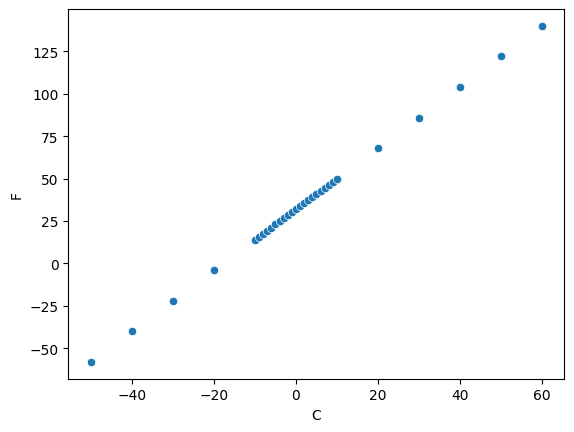

In [13]:
sns.scatterplot(x=degrees_df['C'],y=degrees_df['F'])

In [45]:
X_train = degrees_df.drop('F', axis=1).values
y_train = degrees_df['F'].values

In [83]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
# model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
# model.add(tf.keras.layers.Dropout(rate=0.1,seed=13))
model.add(tf.keras.layers.Dense(1))

In [84]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [86]:
epochs_list = model.fit(X_train, y_train, epochs=1000, verbose=0)

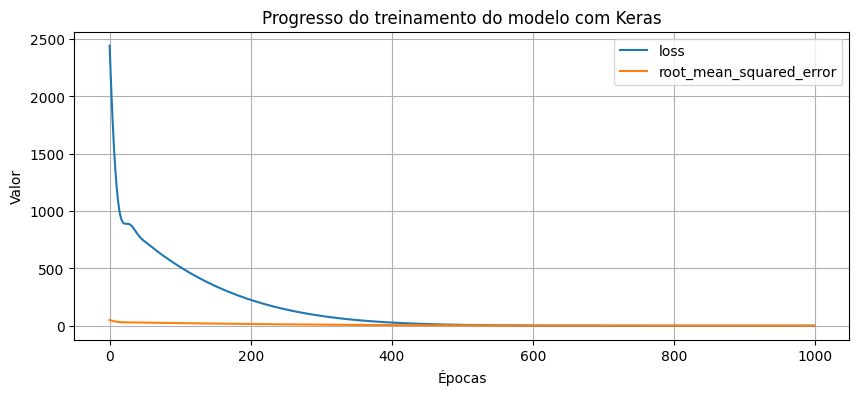

In [87]:
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['root_mean_squared_error'], label='root_mean_squared_error')
plt.title('Progresso do treinamento do modelo com Keras')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
model.weights

[<Variable path=sequential_10/dense_18/kernel, shape=(1, 1), dtype=float32, value=[[1.8000957]]>,
 <Variable path=sequential_10/dense_18/bias, shape=(1,), dtype=float32, value=[31.976063]>]

In [90]:
model.predict(np.array([100, 0, -5, -78, -273])).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


array([[ 212.],
       [  32.],
       [  23.],
       [-108.],
       [-459.]], dtype=float32)